a:0.73


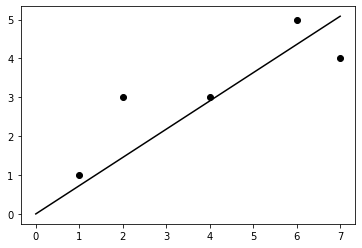

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])

def reg1dim1(x, y):
  a = np.dot(x, y) / (x**2).sum()
  return a

a = reg1dim1(x, y)


plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color="k")

print("a:{:.2f}".format(a))
plt.show()

a:0.50
b:1.20


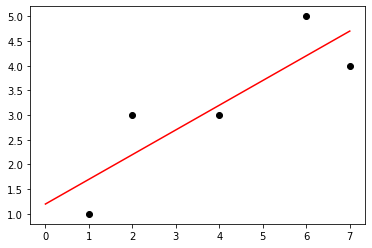

In [ ]:
from os import XATTR_SIZE_MAX
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])

def reg1dim2(x, y):
  n = len(x)
  xy_sum = np.dot(x, y)
  x_sum = x.sum()
  y_sum = y.sum()
  x2_sum = x*x.sum()
  xsum2 = x_sum**2
  a = (xy_sum - (x_sum*y_sum/n)) / (x2_sum - xsum2/n)
  b = (y - a*x).sum() / n
  return a, b

print("a:{:.2f}".format(a))
print("b:{:.2f}".format(b))
plt.scatter(x, y, color="k")
'''
xmax = x.max()
plt.plot([0, xmax], [b, a * xmax + b], color="r")
'''
plt.plot([0, x.max()], [b, a*x.max()+b], color= 'r')
plt.show()


特徴量がn次元の線形回帰

In [ ]:
#アルゴリズムの実装
import numpy as np
from scipy import linalg

#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class LinearRegression:
  def __init__(self):
    self.w_ = None
  
  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    b = np.dot(Xtil.T, t)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)

In [ ]:
# 乱数による人口データで実験
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import linearreg

#乱数で説明変数と目的変数を作成
n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n) #線形和に正規分布から取り出した乱数を足す

model = linearreg.LinearRegression()#モデルのインスタンス生成
model.fit(X, y)#学習
print("係数", model.w_)
print("(1, 1)に対する予測値：", model.predict(np.array([1, 1]))) #予測

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                           np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() +
         model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()


ModuleNotFoundError: ignored

In [ ]:
# ワインのデータ準備
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
# ワインのデータで実験
import pandas as pd
import io
import numpy as np
import csv

# データの読み込み
Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

'''
# データの用意
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
#df = df.values[1:, :]
df = np.array(df.values[1:, :], dtype=np.float64)
'''

# trainとtestにデータ分け
np.random.seed(0)
np.random.shuffle(Xy)
X_train = Xy[:-400, :-1]
X_test = Xy[-400:, :-1]
y_train = Xy[:-400, -1]
y_test = Xy[-400:, -1]

model = LinearRegression()#モデルのインスタンス生成
model.fit(X_train, y_train)#学習
y_pred = model.predict(X_test)

print("最初の5つの正解と予測値:")
for i in range(5):
    print("{:1.0f} {:5.3f}".format(y_test[i], y_pred[i]))

print("RMSE:", np.sqrt(((y_pred - y_test)**2).mean()))

最初の5つの正解と予測値:
5 5.062
6 4.991
5 5.391
5 5.149
5 5.232
RMSE: 0.6383202417328419


ridge回帰

In [ ]:
#アルゴリズムの実装
import numpy as np
from scipy import linalg

#コンストラクタではハイパラのラムダも設定する
#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class RidgeRegression:
  def __init__(self, lamda_=1.):
    self.lamda_ = lamda_
    self.w_ = None
  
  def fit (self, X, y):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil) + self.lamda_ * np.eye(Xtil.shape[1])
    b = np.dot(Xtil.T, y)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)




a: 0.59
b: 0.71


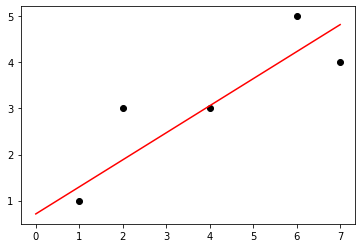

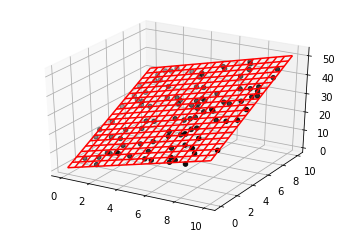

In [ ]:
#実験 まずはインポート
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#特徴量を一次元で実験

#データ用意
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])

model = RidgeRegression(1.) #インスタンス生成。ハイパラも指定。
model.fit(x, y) #学習
b, a = model.w_

print("a:", f"{a:.2f}")
print("b:", f"{b:.2f}")
plt.scatter(x, y, color='k')
x_max = x.max()
plt.plot([0, x_max], [b, a * x_max + b], color='r') #予測値のよる近似線
plt.show()

#特徴量をn次元で実験

# データを乱数で用意。説明変数は一様分布から取り出し。目的変数は説明変数の線形和に正規分布から取り出したものを足す。
n = 100
scale = 10

np.random.seed(0)
X = np.random.random([n, 2]) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = RidgeRegression(1.)#インスタンス生成。ハイパラも指定。
model.fit(X, y) # 学習

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                           np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() +
         model.w_[2] * ymesh.ravel()).reshape(xmesh.shape) # 予測値で近似面作るためのグリッド作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")
plt.show()

線形回帰とridge回帰の違い

In [ ]:
#線形回帰アルゴリズムの実装
import numpy as np
from scipy import linalg

#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class LinearRegression:
  def __init__(self):
    self.w_ = None
  
  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    b = np.dot(Xtil.T, t)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)

#ridge回帰アルゴリズムの実装
import numpy as np
from scipy import linalg

#コンストラクタではハイパラのラムダも設定する
#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class RidgeRegression:
  def __init__(self, lamda_=1.):
    self.lamda_ = lamda_
    self.w_ = None
  
  def fit (self, X, y):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil) + self.lamda_ * np.eye(Xtil.shape[1])
    b = np.dot(Xtil.T, y)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)




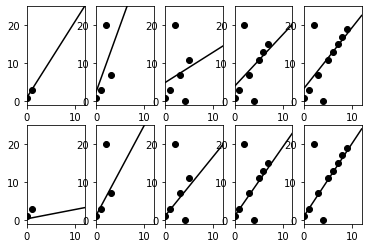

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#外れ値を含んだデータ生成
x = np.arange(12)
y = 1 + 2 * x
y[2] = 20
y[4] = 0

fig, axes = plt.subplots(2, 5)

x_min = 0
x_max = 12
y_min = -1
y_max = 25

for i in range(5):
  # 描画領域を生成
  axes[0, i].set_xlim([x_min, x_max])
  axes[0, i].set_ylim([y_min, y_max])
  axes[1, i].set_xlim([x_min, x_max])
  axes[1, i].set_ylim([y_min, y_max])

  # 変数を作成(２個づつ追加されていくように)し、データのプロット
  xx = x[:2 + i*2]
  yy = y[:2 + i*2]

  axes[0, i].scatter(xx, yy, color='k')
  axes[1, i].scatter(xx, yy, color='k')

  #線形回帰でplotによる近似線作成
  model = LinearRegression()
  model.fit(xx, yy)
  xs = [x_min, x_max]
  ys = [model.w_[0] + model.w_[1] * x_min, model.w_[0] + model.w_[1] * x_max]
  axes[0, i].plot(xs, ys, color='k')

  #ridge回帰でplotによる近似線作成
  model = RidgeRegression(10.)
  model.fit(xx, yy)
  xs = [x_min, x_max]
  ys = [model.w_[0] + model.w_[1] * x_min, model.w_[0] + model.w_[1] * x_max]
  axes[1, i].plot(xs, ys, color='k')

plt.show()

多項式回帰と線形回帰との差

In [ ]:
#線形回帰アルゴリズムの実装
import numpy as np
from scipy import linalg

#fitで学習して、predictで予測というクラスにする
#定数項は追加する
#fitの引数を説明変数と目的変数にする
#fitでの学習結果　= 重みw をコンストラクタのデータ属性に格納する
#predictの引数は説明変数にする

class LinearRegression:
  def __init__(self):
    self.w_ = None
  
  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    b = np.dot(Xtil.T, t)
    self.w_ = linalg.solve(A, b)
  
  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)
  

In [ ]:
# 多項式回帰の実装
import numpy as np

class PolynomialRegression:
  def __init__(self, degree):
    self.degree_ = degree
  
  def fit(self, x, y):
   
    xx = x.reshape(len(x), 1)
    x_pow = []
    for i in range(1, self.degree_ + 1):
      x_pow.append(xx**i)
    mat = np.concatenate(x_pow, axis=1)

    linreg = LinearRegression()
    linreg.fit(mat, y)
    self.w_ = linreg.w_
  
  def predict(self, x):
    r = 0
    for i in range(self.degree_ + 1):
      r += x**i * self.w_[i]
    return r 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.30031e-30): result may not be accurate.


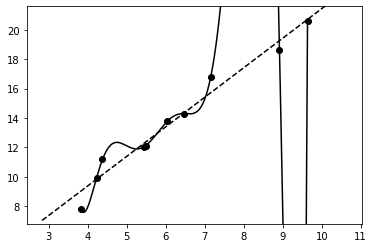

In [ ]:
# 実行　線形回帰の描画を多項式回帰と同様にしてみる
import numpy as np
import matplotlib.pyplot as plt

#データ生成
np.random.seed(0)

def f(x):
  return 1 + 2 * x

x = np.random.random(10)*10
y = f(x) + np.random.randn(10)

#訓練データのプロット
plt.scatter(x, y, color='k')

#多項式回帰
model = PolynomialRegression(10)
model.fit(x, y)
plt.ylim([y.min() - 1, y.max() + 1])
x_polyR = np.linspace(x.min(), x.max(), 300)
y_polyR = np.array([model.predict(u) for u in x_polyR])
plt.plot(x_polyR, y_polyR, color='k')


#線形回帰
model = LinearRegression()
model.fit(x, y)
b, a = model.w_
x_min = x.min()-1
x_max = x.max()+1
plt.plot([x_min, x_max], [a * x_min + b, a * x_max + b], color="k", linestyle="dashed")

plt.show()